In [258]:
import pandas as pd
import numpy as np

In [259]:
col_names = ['age', 'workclass', 'fnlwgt', 
             'education', 'education_num',
             'marital_status', 'occupation', 
             'relationship', 'race', 'sex',
            'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', '50k']

In [260]:
df_train_raw = pd.read_csv('census-income.data.csv', names = col_names)

In [261]:
df_train_raw = df_train_raw.replace(' ?', np.nan)

In [262]:
df_train_raw.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [263]:
train_target = pd.get_dummies(df_train_raw).iloc[:,-1]

In [264]:
train_target.head()

0    0
1    0
2    0
3    0
4    0
Name: 50k_ >50K, dtype: uint8

In [265]:
train_target.value_counts()

0    24720
1     7841
Name: 50k_ >50K, dtype: int64

In [266]:
train_features_raw = df_train_raw.iloc[:,:-1]

In [267]:
len(train_features_raw.columns)

14

In [268]:
df_continuous = pd.concat([train_features_raw.age,
           train_features_raw.fnlwgt,
           train_features_raw.capital_gain,
           train_features_raw.capital_loss,
           train_features_raw.hours_per_week], axis=1)

In [269]:
train_features_raw = df_train_raw.iloc[:,:-1]

In [270]:
train_features_raw.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [271]:
train_features_raw.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [272]:
train_features_raw.native_country.replace(np.nan, ' United-States', inplace = True)

In [273]:
df_continuous = pd.concat([train_features_raw.age,
                         train_features_raw.fnlwgt,
                         train_features_raw.capital_gain,
                         train_features_raw.capital_loss,
                         train_features_raw.hours_per_week], axis = 1)

In [274]:
native_country = pd.get_dummies(train_features_raw.native_country)
native_country.head()

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
len(native_country.columns)

41

In [307]:
train_features_raw.workclass.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [308]:
train_features_raw.workclass.replace(np.nan, ' Private', inplace = True)

In [309]:
workclass = pd.get_dummies(train_features_raw.workclass) 
workclass.head()

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [310]:
len(workclass.columns)

8

In [311]:
train_features_raw.occupation.value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [312]:
train_features_raw.occupation.replace(np.nan, ' Prof-specialty', inplace = True)

In [313]:
occupation = pd.get_dummies(train_features_raw.occupation) 
len(occupation.columns)

14

In [314]:
occupation.head()

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [315]:
marital_status = pd.get_dummies(train_features_raw.marital_status)
marital_status.head()
len(marital_status.columns)

7

In [316]:
relationship = pd.get_dummies(train_features_raw.relationship)
relationship.head()
len(relationship.columns)

6

In [317]:
race = pd.get_dummies(train_features_raw.iloc[:,8])
race.head()
len(race.columns)

5

In [318]:
sex = pd.get_dummies(train_features_raw.iloc[:,9])
sex.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [319]:
native_country.columns.get_loc(' Holand-Netherlands')

14

In [320]:
df1 = df_continuous.merge(sex, left_index = True, right_index = True)
df2 = df1.merge(race, left_index = True, right_index = True)
df3 = df2.merge(relationship, left_index = True, right_index = True)
df4 = df3.merge(marital_status, left_index = True, right_index = True)
df5 = df4.merge(native_country, left_index = True, right_index = True)
df6 = df5.merge(workclass, left_index = True, right_index = True)
df_mode = df6.merge(occupation, left_index = True, right_index = True)

In [326]:
len(df_mode.columns)

88

In [327]:
df_mode.insert(loc=88, column = '>50k', value =train_target)

In [328]:
df_mode.columns = [x.strip() for x in df_mode.columns]

In [329]:
len(df_mode.columns)

89

In [330]:
df_mode.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,>50k
0,39,77516,2174,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,0,0,13,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,53,234721,0,0,40,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,28,338409,0,0,40,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [331]:
df_mode.columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'Female', 'Male', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black',
       'Other', 'White', 'Husband', 'Not-in-family', 'Other-relative',
       'Own-child', 'Unmarried', 'Wife', 'Divorced', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Cambodia', 'Canada', 'China', 'Columbia',
       'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran',
       'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
       'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand',
       'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia',
       'Federal-gov', 'Local-gov', 'Never-worked', 'Pr

In [332]:
print(df_mode.age.mean(), df_mode.age.std()) 

38.58164675532078 13.640432553581146


In [333]:
df_mode.age = (df_mode.age - df_mode.age.mean())/df_mode.age.std()

In [334]:
print(df_mode.fnlwgt.mean(), df_mode.fnlwgt.std())

189778.36651208502 105549.97769702233


In [335]:
df_mode.fnlwgt = (df_mode.fnlwgt - df_mode.fnlwgt.mean())/df_mode.fnlwgt.std()

In [336]:
print(df_mode.capital_gain.mean(), df_mode.capital_gain.std())

1077.6488437087312 7385.292084839299


In [337]:
df_mode.capital_gain = (df_mode.capital_gain - df_mode.capital_gain.mean()) / df_mode.capital_gain.std()

In [338]:
print(df_mode.capital_loss.mean(), df_mode.capital_loss.std())

87.303829734959 402.960218649059


In [339]:
df_mode.capital_gain = (df_mode.capital_loss  - df_mode.capital_loss.mean())/df_mode.capital_loss.std()

In [340]:
print(df_mode.hours_per_week.mean(), df_mode.hours_per_week.std())

40.437455852092995 12.34742868173081


In [341]:
df_mode.hours_per_week = (df_mode.hours_per_week - df_mode.hours_per_week.mean()) / df_mode.hours_per_week.std()

In [342]:
df_mode.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,>50k
0,0.030670,-1.063594,-0.216656,0,-0.035429,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.837096,-1.008692,-0.216656,0,-2.222119,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.042641,0.245075,-0.216656,0,-0.035429,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.057031,0.425795,-0.216656,0,-0.035429,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,-0.775756,1.408154,-0.216656,0,-0.035429,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [344]:
df_mode.to_csv('train_mode_file.csv')

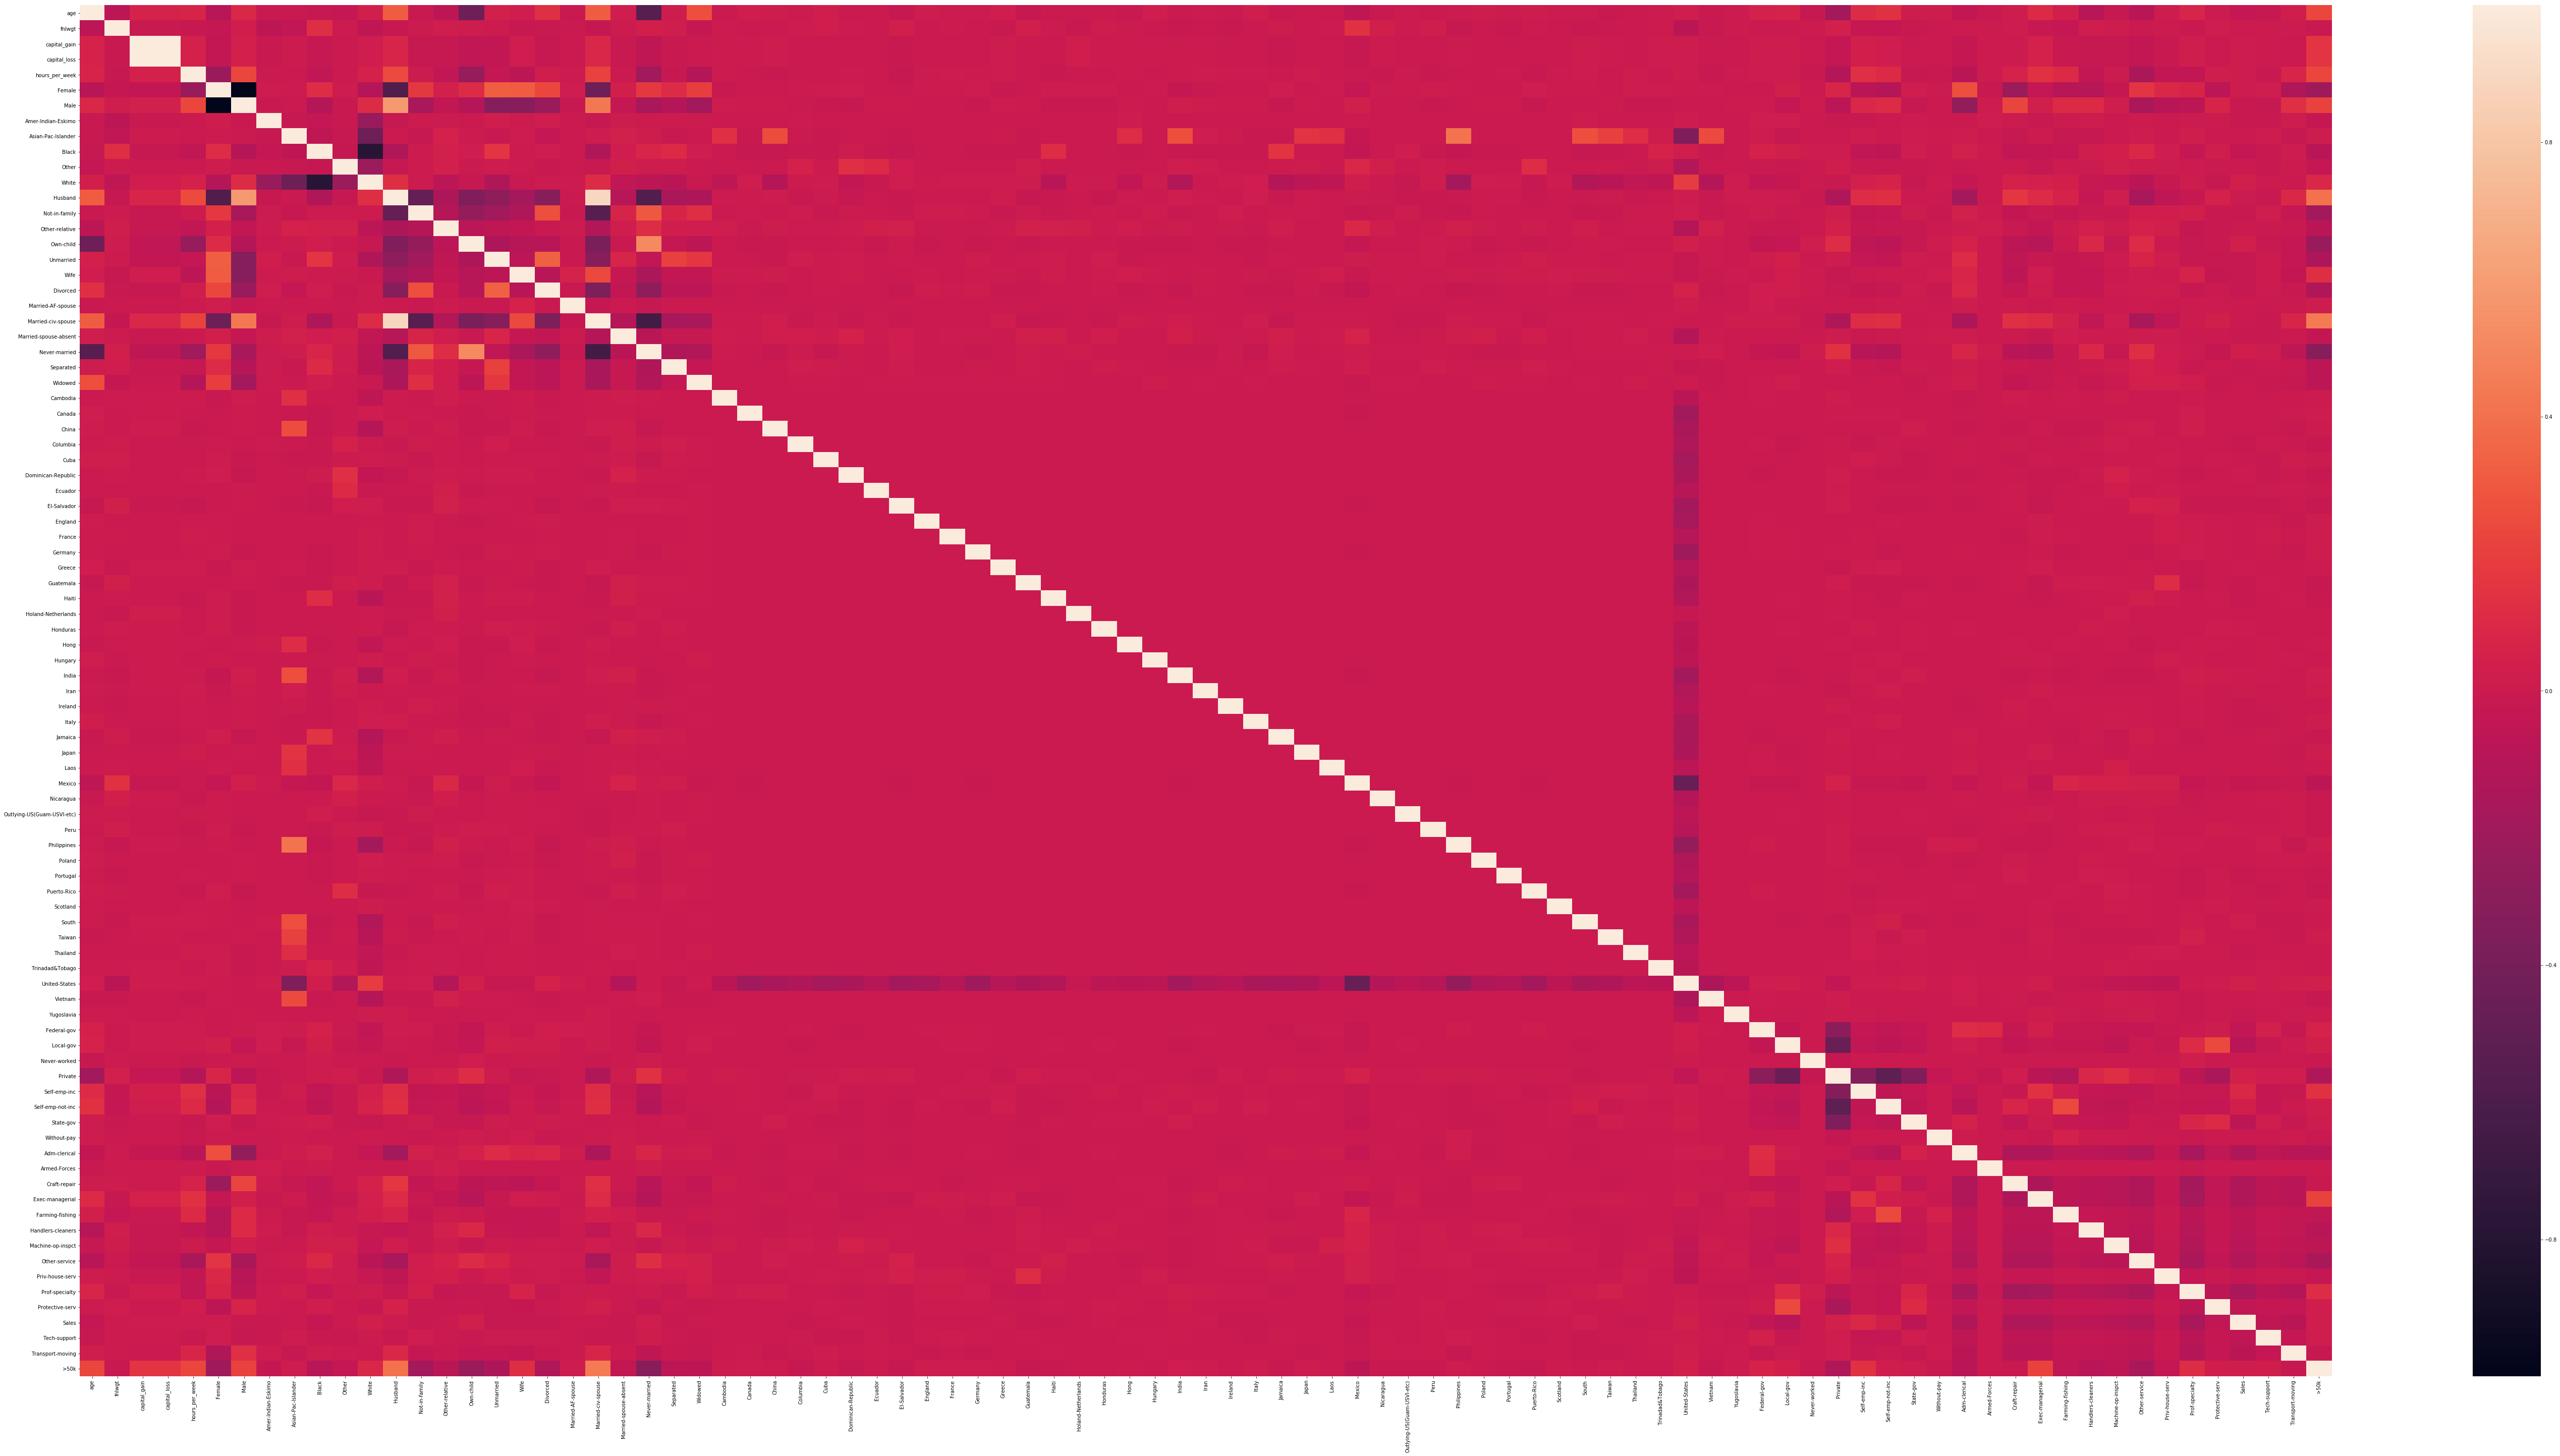

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(100,50))
sns.heatmap(df_mode.corr())
